In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
#from tensorflow.keras.utils import np_utils
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
tensorflow.keras.backend.set_session(sess)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


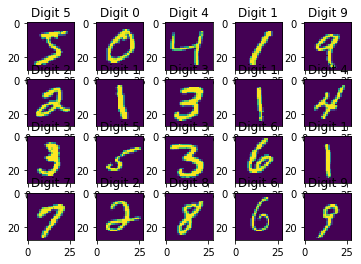

In [5]:
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title("Digit {}".format(y_train[i]))

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print("New x_train", x_train.shape)
print("New x_test", x_test.shape)

New x_train (60000, 784)
New x_test (10000, 784)


In [7]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [8]:

model2 = Sequential()
model2.add(Dense(10, input_shape=(784,)))
model2.add(Activation('relu'))  

model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dropout(rate = 0.6))
# model2.add(Dense(512))
# model2.add(Activation('relu'))
# model2.add(Dropout(rate = 0.6))

model2.add(Dense(10))
model2.add(Activation('softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.6132 - acc: 0.8096
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3636 - acc: 0.8972
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3236 - acc: 0.9086
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3013 - acc: 0.9134
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2824 - acc: 0.9180


[4.1660004e-09 8.1057321e-09 4.2132513e-05 1.6057727e-04 1.7165963e-11
 2.9726304e-09 3.8627353e-17 9.9979120e-01 1.2345959e-08 6.0415700e-06]


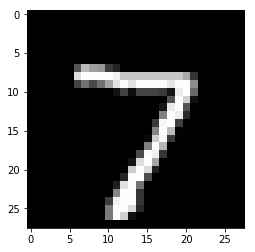

Predicted digit:  7
------------------------------
[7.28880764e-07 1.83575503e-05 9.91871893e-01 8.04976560e-03
 1.61215303e-06 1.40150723e-06 2.21412122e-07 4.42233249e-05
 1.16598685e-05 1.62449201e-08]


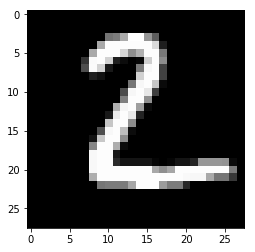

Predicted digit:  2
------------------------------
[8.4240452e-07 9.9473888e-01 6.3562632e-04 7.2242110e-04 4.4455344e-04
 5.0954230e-05 1.3078954e-05 2.5960673e-03 6.3320837e-04 1.6419905e-04]


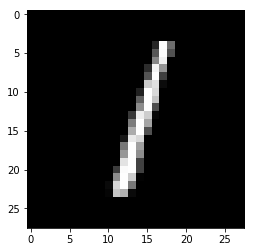

Predicted digit:  1
------------------------------
[9.9734110e-01 4.7504933e-08 2.7250202e-04 1.3671666e-04 1.8281463e-07
 1.9206741e-03 1.7404363e-05 1.4453018e-05 1.4485072e-05 2.8236079e-04]


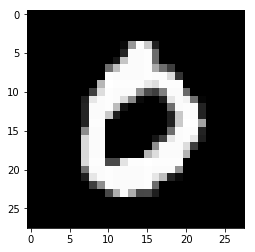

Predicted digit:  0
------------------------------
[5.1024654e-06 2.0096329e-07 7.4519456e-05 6.7105702e-06 9.7310233e-01
 1.8868162e-04 4.5777939e-05 4.3021890e-04 3.7988360e-05 2.6108421e-02]


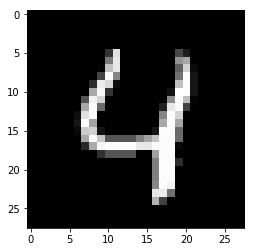

Predicted digit:  4
------------------------------
[1.6224629e-08 9.9804085e-01 1.2531673e-04 2.3609895e-04 1.5809288e-05
 9.1634200e-07 7.2269074e-08 1.3930044e-03 1.5626290e-04 3.1559277e-05]


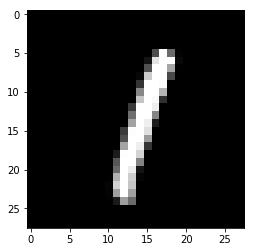

Predicted digit:  1
------------------------------
[6.0989214e-10 1.9051380e-07 5.0711998e-07 1.2334245e-05 9.9518615e-01
 1.0113883e-04 3.2740239e-08 1.0706918e-04 1.3076066e-05 4.5794761e-03]


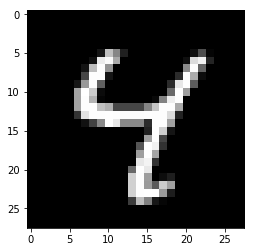

Predicted digit:  4
------------------------------
[1.03297925e-05 1.95265170e-06 5.31670812e-04 7.87250814e-04
 2.24340684e-03 2.80635315e-04 4.02670639e-06 7.21787754e-03
 3.11281474e-04 9.88611639e-01]


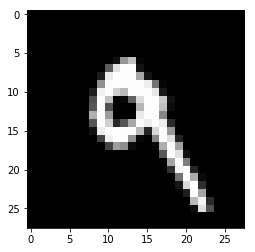

Predicted digit:  9
------------------------------
[1.3349213e-03 1.7810996e-07 9.1497327e-04 3.7131942e-06 1.5469755e-01
 6.4647180e-01 1.6409235e-01 3.0184975e-08 2.9794866e-02 2.6896666e-03]


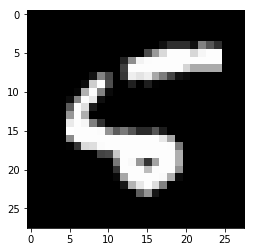

Predicted digit:  5
------------------------------
[1.2040547e-07 1.9622008e-09 4.0557929e-06 3.9200104e-06 6.7831228e-05
 1.6533050e-07 4.2015316e-10 1.6345853e-02 4.7526194e-07 9.8357761e-01]


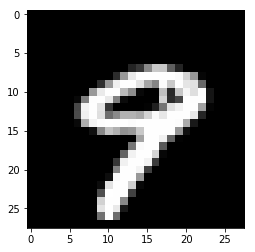

Predicted digit:  9
------------------------------


In [10]:
pred_array = (model2.predict(x_test))
for image_number in range(10):
    prediction = pred_array[image_number]
    print(prediction)
    plt.imshow(x_test[image_number].reshape(28,28), cmap="gray")
    plt.show()
    print("Predicted digit: ",np.argmax(prediction))
    print("------------------------------")

In [13]:
#pred_array = tf.keras.utils.to_categorical(pred_array, 10)
score = 0
for i in range(len(y_test)):
    if pred_array[i].all() == y_test[i].all():
        score = score + 1
print(score)

10000
